In [55]:
import pandas as pd
import numpy as np
import datetime

In [56]:
factors = pd.read_csv('your csv')


In [57]:
# Dropped unneccesary columns and clean the df

df = factors.drop(['severity', 'description'], axis = 1)
df.dropna(inplace=True)
df = df.convert_dtypes()
df['symptom_date'] = pd.to_datetime(df['symptom_date'], errors='coerce')
df['logged_at'] = pd.to_datetime(df['logged_at'], errors='coerce')
new_resulting_factors = df

In [58]:
# Read the second df and clean them
patient_info = pd.read_csv('your csv')
patient_info.drop(['external_id'], axis = 1, inplace=True)
patient_info.dropna(inplace=True)
patient_info = patient_info.convert_dtypes()
patient_info['date_of_birth'] = pd.to_datetime(patient_info['date_of_birth'], errors='coerce')

In [ ]:
# Merge them for analysis
merged_df1 = pd.merge(new_resulting_factors, patient_info, left_on='patient_about_id', right_on='patient_id', how='inner')
merged_df1.dropna(inplace=True)
merged_df1.drop(['id', 'user_input_id', 'had_symptom', 'patient_about_id', 'first_name', 'last_name', 'patient_type', 'symptom_id'], axis = 1, inplace=True)
for col in merged_df1.columns:
    level_counts = merged_df1[col].value_counts()
    print(f"Column: {col}")
    print(level_counts)
    print()

In [ ]:
# find age at symptom reported

merged_df1['age'] = merged_df1['symptom_date'].dt.year - merged_df1['date_of_birth'].dt.year
merged_df1.drop(['date_of_birth', 'patient_id', 'logged_at', 'symptom_date'], axis = 1, inplace=True)
for col in merged_df1.columns:
    level_counts = merged_df1[col].value_counts()
    print(f"Column: {col}")
    print(level_counts)
    print()

In [ ]:
# Clean, make age and gender proper

merged_df1 = merged_df1[merged_df1['age'] > 0]
merged_df1 = merged_df1[merged_df1['gender'] != 'other']
merged_df1.describe

In [62]:
# modeling
# cluster/find gender
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:

# Preprocess the data
X = merged_df1[['factor' ,'category', 'subcategory', 'age']]  # Features
y = merged_df1['gender']  # Target variable
X = pd.get_dummies(X)
# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Regression
rg_model = LogisticRegression()
rg_model.fit(X_train, y_train)

# MLP
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# On Train
# Results
rg_predictions = rg_model.predict(X_train)
mlp_predictions = mlp_model.predict(X_train)
dt_predictions = dt_model.predict(X_train)
rf_predictions = rf_model.predict(X_train)

# Accuracy
rg_accuracy = accuracy_score(y_train, rg_predictions)
mlp_accuracy = accuracy_score(y_train, mlp_predictions)
dt_accuracy = accuracy_score(y_train, dt_predictions)
rf_accuracy = accuracy_score(y_train, rf_predictions)

print("Regression Accuracy on Train Data:", rg_accuracy)
print("multi-layer perceptron Accuracy on Train Data::", mlp_accuracy)
print("Decision Tree Accuracy on Train Data:", dt_accuracy)
print("Random Forest Accuracy on Train Data::", rf_accuracy)

# On test
trg_predictions = rg_model.predict(X_test)
tmlp_predictions = mlp_model.predict(X_test)
tdt_predictions = dt_model.predict(X_test)
trf_predictions = rf_model.predict(X_test)

trg_accuracy = accuracy_score(y_test, trg_predictions)
tmlp_accuracy = accuracy_score(y_test, tmlp_predictions)
tdt_accuracy = accuracy_score(y_test, tdt_predictions)
trf_accuracy = accuracy_score(y_test, trf_predictions)

# Print the accuracies
print("Regression Accuracy on Test Data:", trg_accuracy)
print("multi-layer perceptron Accuracy on Test Data::", tmlp_accuracy)
print("Decision Tree Accuracy on Test Data:", tdt_accuracy)
print("Random Forest Accuracy on Test Data::", trf_accuracy)


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Regression Accuracy on Train Data: 0.6870125529228255
multi-layer perceptron Accuracy on Train Data:: 0.8774047389140608
Decision Tree Accuracy on Train Data: 0.950029711059942
Random Forest Accuracy on Train Data:: 0.950029711059942
Regression Accuracy on Test Data: 0.6892965906558717
multi-layer perceptron Accuracy on Test Data:: 0.8617692936195499
Decision Tree Accuracy on Test Data: 0.9277278466909307
Random Forest Accuracy on Test Data:: 0.9214142464532422


In [65]:
# Calculate the precision, recall, and F1 score
trg_precision = precision_score(y_test, trg_predictions, pos_label='female')
tmlp_precision = precision_score(y_test, tmlp_predictions, pos_label='female')
tdt_precision = precision_score(y_test, tdt_predictions, pos_label='female')
trf_precision = precision_score(y_test, trf_predictions, pos_label='female')

trg_recall = recall_score(y_test, trg_predictions, pos_label='female')
tmlp_recall = recall_score(y_test, tmlp_predictions, pos_label='female')
tdt_recall = recall_score(y_test, tdt_predictions, pos_label='female')
trf_recall = recall_score(y_test, trf_predictions, pos_label='female')

trg_f1_score = f1_score(y_test, trg_predictions, pos_label='female')
tmlp_f1_score = f1_score(y_test, tmlp_predictions, pos_label='female')
tdt_f1_score = f1_score(y_test, tdt_predictions, pos_label='female')
trf_f1_score = f1_score(y_test, trf_predictions, pos_label='female')

# Create the data dictionary
data = {
    'Model': ['Logistic Regression', 'Multi-layer Perception', 'Decision Tree', 'Random Forest'],
    'Accuracy': [trg_accuracy, tmlp_accuracy, tdt_accuracy, trf_accuracy],
    'Precision': [trg_precision, tmlp_precision, tdt_precision, trf_precision],
    'Recall': [trg_recall, tmlp_recall, tdt_recall, trf_recall],
    'F1 Score': [trg_f1_score, tmlp_f1_score, tdt_f1_score, trf_f1_score],
    'Training Score': [rg_accuracy, mlp_accuracy, dt_accuracy, rf_accuracy],
    'Testing Score': [trg_accuracy, tmlp_accuracy, tdt_accuracy, trf_accuracy],
    'Difference': [rg_accuracy-trg_accuracy, mlp_accuracy-tmlp_accuracy, dt_accuracy-tdt_accuracy, rf_accuracy-trf_accuracy]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
#print(df)

In [66]:
sorted_df_accuracy_gender = df.sort_values(by='Accuracy', ascending=False)
sorted_df_accuracy_gender

,Model,Accuracy,Precision,Recall,F1 Score,Training Score,Testing Score,Difference
2,Decision Tree,0.927728,0.921329,0.946401,0.933697,0.950030,0.927728,0.022302
3,Random Forest,0.921414,0.918144,0.937422,0.927683,0.950030,0.921414,0.028615
1,Multi-layer Perception,0.861769,0.878519,0.862136,0.870250,0.877405,0.861769,0.015635
0,Logistic Regression,0.689297,0.727516,0.674955,0.700251,0.687013,0.689297,-0.002284


The Decision Tree and Random Forest models perform the best, showing high accuracy, precision, recall, and F1 scores. They are well-fitted to the data, with the Decision Tree model demonstrating better generalization. The MLP model performs reasonably well but exhibits a potential overfitting issue. The Logistic Regression model performs the poorest among the models, struggling to predict the gender groups accurately.

In [67]:
# group by age?
# age groups
from sklearn.linear_model import LinearRegression
def create_age_group(age):
    if age < 30:
        return 'Under 30'
    elif age < 35:
        return '30-34'
    elif age < 40:
        return '35-39'
    elif age < 45:
        return '40-44'
    elif age < 50:
        return '45-49'
    elif age < 55:
        return '50-54'
    elif age < 60:
        return '55-59'
    elif age < 65:
        return '60-64'
    else:
        return '65 and above'

merged_df2 = merged_df1

merged_df2['age_group'] = merged_df2['age'].apply(create_age_group)

#count incidents by age group
age_group_counts = merged_df2.groupby('age_group').size()

age_group_counts
# interesting, we can see two peaks, wondering what are the symptoms' difference. Is it possible to do an SVM?



age_group
30-34            3434
35-39            9418
40-44            5236
45-49            2699
50-54            4635
55-59            6196
60-64           15208
65 and above    16445
Under 30         4044
dtype: int64

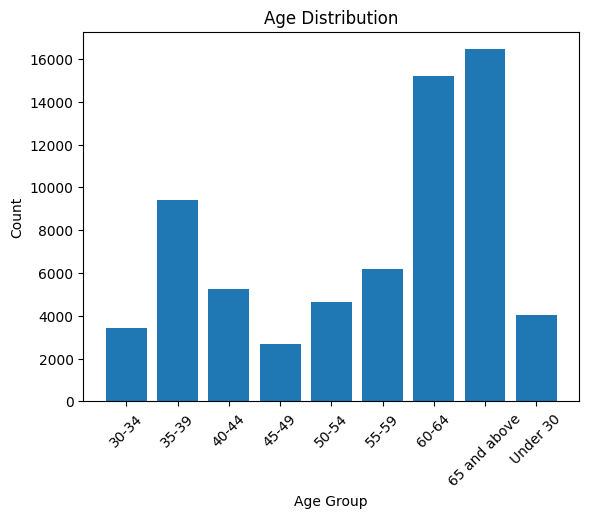

In [68]:
# Plot the distribution

import matplotlib.pyplot as plt

# Data
age_group = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65 and above', 'Under 30']
count = [3434, 9418, 5236, 2699, 4635, 6196, 15208, 16445, 4044]

# Plotting
plt.bar(age_group, count)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [69]:

df = merged_df1.copy()
# convert age to binary classification
df['target'] = df['age'].apply(lambda x: 0 if x < 45 else 1)

X = df[['factor', 'category', 'subcategory', 'gender']]
y = df['target']

X = pd.get_dummies(X)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_train, y_pred_train)
#classification_report = classification_report(y_train, y_pred_train)

print("Train Accuracy:", accuracy)
#print("Train Classification Report:\n", classification_report)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Test Accuracy:", accuracy)
print("Test Classification Report:\n", classification_report)



Train Accuracy: 0.7447819950976751
Test Accuracy: 0.7413652232043378
Test Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.38      0.50      4471
           1       0.75      0.92      0.83      8992

    accuracy                           0.74     13463
   macro avg       0.73      0.65      0.66     13463
weighted avg       0.73      0.74      0.72     13463



C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
# Age instead of Gender
X = df[['factor' ,'category', 'subcategory', 'gender']]  # Features
y = df['target']  # Target variable
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression
rg_model = LogisticRegression()
rg_model.fit(X_train, y_train)

# MLP
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# On Train
# Results
rg_predictions = rg_model.predict(X_train)
mlp_predictions = mlp_model.predict(X_train)
dt_predictions = dt_model.predict(X_train)
rf_predictions = rf_model.predict(X_train)

# Accuracy
rg_accuracy = accuracy_score(y_train, rg_predictions)
mlp_accuracy = accuracy_score(y_train, mlp_predictions)
dt_accuracy = accuracy_score(y_train, dt_predictions)
rf_accuracy = accuracy_score(y_train, rf_predictions)

print("Regression Accuracy on Train Data:", rg_accuracy)
print("multi-layer perceptron Accuracy on Train Data::", mlp_accuracy)
print("Decision Tree Accuracy on Train Data:", dt_accuracy)
print("Random Forest Accuracy on Train Data::", rf_accuracy)

# On test
trg_predictions = rg_model.predict(X_test)
tmlp_predictions = mlp_model.predict(X_test)
tdt_predictions = dt_model.predict(X_test)
trf_predictions = rf_model.predict(X_test)

trg_accuracy = accuracy_score(y_test, trg_predictions)
tmlp_accuracy = accuracy_score(y_test, tmlp_predictions)
tdt_accuracy = accuracy_score(y_test, tdt_predictions)
trf_accuracy = accuracy_score(y_test, trf_predictions)

# Print the accuracies
print("Regression Accuracy on Test Data:", trg_accuracy)
print("multi-layer perceptron Accuracy on Test Data::", tmlp_accuracy)
print("Decision Tree Accuracy on Test Data:", tdt_accuracy)
print("Random Forest Accuracy on Test Data::", trf_accuracy)

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regression Accuracy on Train Data: 0.7422565550025997
multi-layer perceptron Accuracy on Train Data:: 0.7671767065290054
Decision Tree Accuracy on Train Data: 0.7695721607368343
Random Forest Accuracy on Train Data:: 0.7695721607368343
Regression Accuracy on Test Data: 0.7410681126049172
multi-layer perceptron Accuracy on Test Data:: 0.7560721978756593
Decision Tree Accuracy on Test Data: 0.7593404144692862
Random Forest Accuracy on Test Data:: 0.7595632474188516


In [71]:
# Calculate the precision, recall, and F1 score
trg_precision = precision_score(y_test, trg_predictions)
tmlp_precision = precision_score(y_test, tmlp_predictions)
tdt_precision = precision_score(y_test, tdt_predictions)
trf_precision = precision_score(y_test, trf_predictions)

trg_recall = recall_score(y_test, trg_predictions)
tmlp_recall = recall_score(y_test, tmlp_predictions)
tdt_recall = recall_score(y_test, tdt_predictions)
trf_recall = recall_score(y_test, trf_predictions)

trg_f1_score = f1_score(y_test, trg_predictions)
tmlp_f1_score = f1_score(y_test, tmlp_predictions)
tdt_f1_score = f1_score(y_test, tdt_predictions)
trf_f1_score = f1_score(y_test, trf_predictions)

# Create the data dictionary
data = {
    'Model': ['Logistic Regression', 'Multi-layer Perception', 'Decision Tree', 'Random Forest'],
    'Accuracy': [trg_accuracy, tmlp_accuracy, tdt_accuracy, trf_accuracy],
    'Precision': [trg_precision, tmlp_precision, tdt_precision, trf_precision],
    'Recall': [trg_recall, tmlp_recall, tdt_recall, trf_recall],
    'F1 Score': [trg_f1_score, tmlp_f1_score, tdt_f1_score, trf_f1_score],
    'Training Score': [rg_accuracy, mlp_accuracy, dt_accuracy, rf_accuracy],
    'Testing Score': [trg_accuracy, tmlp_accuracy, tdt_accuracy, trf_accuracy],
    'Difference': [rg_accuracy-trg_accuracy, mlp_accuracy-tmlp_accuracy, dt_accuracy-tdt_accuracy, rf_accuracy-trf_accuracy]
}

# Create the DataFrame
df = pd.DataFrame(data)

In [72]:
sorted_df_accuracy_age = df.sort_values(by='Accuracy', ascending=False)
sorted_df_accuracy_age

,Model,Accuracy,Precision,Recall,F1 Score,Training Score,Testing Score,Difference
3,Random Forest,0.759563,0.770824,0.910810,0.834990,0.769572,0.759563,0.010009
2,Decision Tree,0.759340,0.770657,0.910698,0.834846,0.769572,0.759340,0.010232
1,Multi-layer Perception,0.756072,0.777087,0.890125,0.829774,0.767177,0.756072,0.011105
0,Logistic Regression,0.741068,0.749050,0.920819,0.826100,0.742257,0.741068,0.001188


 The Decision Tree, Random Forest, and MLP models show similar performances with decent accuracy, precision, recall, and F1 scores. They all exhibit a slight overfitting issue. On the other hand, the Logistic Regression model shows lower overall performance but demonstrates good recall and less overfitting. Further analysis and experimentation may be required to determine the most suitable model for your specific needs.